In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import shuffle, seed
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
df = pd.read_csv('telco.csv')
df

FileNotFoundError: [Errno 2] File telco.csv does not exist: 'telco.csv'

In [140]:
ddf.head()

,id,고객ID,성별,연령,개시일,서비스기간,단선횟수,지불방법,요금제,이탈여부,...,총통화요금,부과요금,납부여부,평균납부요금,주간통화비율,야간통화비율,주말통화비율,국제통화비율,통화품질불만,미사용
0,1,K345740,여,17,16/12/99,10.033333,1,선불,CAT 100,유지,...,33.543223,138.543223,OK,0.194772,0.543453,0.362302,0.094245,0.186507,F,F
1,2,K303110,남,23,19/09/97,37.300000,0,선불,CAT 100,유지,...,30.487352,135.487352,OK,0.173097,0.666576,0.317729,0.015695,0.068272,F,F
2,3,K284280,남,42,06/11/96,47.866667,0,선불,CAT 100,유지,...,28.811205,133.811205,OK,0.183145,0.545705,0.394580,0.059715,0.118708,F,F
3,4,K107660,남,52,17/11/99,11.000000,0,선불,CAT 100,유지,...,130.563822,235.563822,OK,0.190174,0.723052,0.214626,0.062321,0.312849,F,F
4,5,K110320,여,38,15/08/98,26.300000,6,선불,CAT 100,유지,...,82.914955,187.914955,OK,0.197186,0.594505,0.283097,0.122398,0.322487,F,F


In [141]:
df2.head()

,이탈여부,성별,연령,서비스기간,단선횟수,요금제,주간통화횟수,주간통화시간_분,야간통화횟수,야간통화시간_분,...,국내통화요금,총통화요금,부과요금,납부여부,평균납부요금,주간통화비율,야간통화비율,주말통화비율,국제통화비율,통화품질불만
0,1.0,1.0,0.207317,0.172394,0.066667,0.25,0.026667,0.112283,0.040185,0.189529,...,0.000000,0.070702,0.221870,0.0,0.035081,0.543453,0.362302,0.094245,0.029785,0.0
1,1.0,0.0,0.280488,0.640893,0.000000,0.25,0.005217,0.168321,0.122102,0.203141,...,0.076450,0.064261,0.216976,0.0,0.031177,0.666576,0.317729,0.015695,0.010903,0.0
2,1.0,0.0,0.512195,0.822451,0.000000,0.25,0.126957,0.122829,0.125193,0.224869,...,0.027422,0.060728,0.214292,0.0,0.032987,0.545705,0.394580,0.059715,0.018957,0.0
3,1.0,0.0,0.634146,0.189003,0.000000,0.25,0.046957,0.235112,0.106646,0.176702,...,0.207476,0.275199,0.377244,0.0,0.034253,0.723052,0.214626,0.062321,0.049961,0.0
4,1.0,1.0,0.463415,0.451890,0.400000,0.25,0.064928,0.147643,0.114374,0.178010,...,0.065187,0.174766,0.300937,0.0,0.035516,0.594505,0.283097,0.122398,0.051501,0.0


In [3]:
df.columns

Index(['id', '고객ID', '성별', '연령', '개시일', '서비스기간', '단선횟수', '지불방법', '요금제', '이탈여부',
       '핸드셋', '주간통화횟수', '주간통화시간_분', '야간통화횟수', '야간통화시간_분', '주말통화횟수', '주말통화시간_분',
       '국제통화시간_분', '국내통화요금_분', '평균주간통화시간', '평균야간통화시간', '평균주말통화시간', '국내통화횟수',
       '국내통화시간_분', '평균국내통화시간', '총통화시간_분', '통화량구분', '요금부과시간', '분당통화요금',
       '국내통화요금', '총통화요금', '부과요금', '납부여부', '평균납부요금', '주간통화비율', '야간통화비율',
       '주말통화비율', '국제통화비율', '통화품질불만', '미사용'],
      dtype='object')

In [4]:
df = df.drop('id', axis=1)
df = df.drop('고객ID', axis=1)
df = df.drop('개시일', axis=1)
df = df.drop('지불방법', axis=1)
df = df.drop('핸드셋', axis=1)
df = df.drop('통화량구분', axis=1)
df = df.drop('미사용', axis=1)

In [5]:
df['성별'] = df['성별'].replace('남', 0)
df['성별'] = df['성별'].replace('여', 1)
df['요금제'] = df['요금제'].replace('CAT 50', 0)
df['요금제'] = df['요금제'].replace('CAT 100', 1)
df['요금제'] = df['요금제'].replace('CAT 200', 2)
df['요금제'] = df['요금제'].replace('Play 100', 3)
df['요금제'] = df['요금제'].replace('Play 300', 4)
df['이탈여부'] = df['이탈여부'].replace('이탈', 0)
df['이탈여부'] = df['이탈여부'].replace('유지', 1)
df['납부여부'] = df['납부여부'].replace('OK', 0)
df['납부여부'] = df['납부여부'].replace('High CAT 50', 1)
df['납부여부'] = df['납부여부'].replace('High CAT 100', 2)
df['납부여부'] = df['납부여부'].replace('High Play 100', 3)
df['통화품질불만'] = df['통화품질불만'].replace('F', 0)
df['통화품질불만'] = df['통화품질불만'].replace('T', 1)
df

,성별,연령,서비스기간,단선횟수,요금제,이탈여부,주간통화횟수,주간통화시간_분,야간통화횟수,야간통화시간_분,...,국내통화요금,총통화요금,부과요금,납부여부,평균납부요금,주간통화비율,야간통화비율,주말통화비율,국제통화비율,통화품질불만
0,1,17,10.033333,1,1,1,46,325.800000,26,217.200000,...,0.000000,33.543223,138.543223,0,0.194772,0.543453,0.362302,0.094245,0.186507,0
1,0,23,37.300000,0,1,1,9,488.399999,79,232.800001,...,15.480459,30.487352,135.487352,0,0.173097,0.666576,0.317729,0.015695,0.068272,0
2,0,42,47.866667,0,1,1,219,356.400000,81,257.700000,...,5.552694,28.811205,133.811205,0,0.183145,0.545705,0.394580,0.059715,0.118708,0
3,0,52,11.000000,0,1,1,81,682.200000,69,202.500000,...,42.011852,130.563822,235.563822,0,0.190174,0.723052,0.214626,0.062321,0.312849,0
4,1,38,26.300000,6,1,1,112,428.400001,74,204.000000,...,13.199725,82.914955,187.914955,0,0.197186,0.594505,0.283097,0.122398,0.322487,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31764,0,53,34.266667,12,4,0,75,402.599998,207,461.400002,...,0.000000,17.118338,95.058338,0,0.098019,0.434304,0.497735,0.067961,0.046166,1
31765,1,36,20.333333,12,4,1,284,529.200000,158,554.100001,...,0.000000,71.790678,149.730678,0,0.118012,0.485817,0.508675,0.005508,0.164763,1
31766,0,13,13.266667,14,4,0,20,615.600000,291,546.299999,...,0.000000,104.686678,182.626678,0,0.121669,0.496732,0.440813,0.062455,0.211181,1
31767,0,31,28.266667,13,4,0,178,377.400000,277,474.600000,...,0.000000,95.798476,173.738476,0,0.151407,0.415639,0.522687,0.061674,0.263762,1


In [6]:
df2 = pd.DataFrame()
df2['이탈여부'] = df['이탈여부']
for i in df.columns:
    df2[i] = df[i]
    if i == '이탈여부':
        pass

df2

,이탈여부,성별,연령,서비스기간,단선횟수,요금제,주간통화횟수,주간통화시간_분,야간통화횟수,야간통화시간_분,...,국내통화요금,총통화요금,부과요금,납부여부,평균납부요금,주간통화비율,야간통화비율,주말통화비율,국제통화비율,통화품질불만
0,1,1,17,10.033333,1,1,46,325.800000,26,217.200000,...,0.000000,33.543223,138.543223,0,0.194772,0.543453,0.362302,0.094245,0.186507,0
1,1,0,23,37.300000,0,1,9,488.399999,79,232.800001,...,15.480459,30.487352,135.487352,0,0.173097,0.666576,0.317729,0.015695,0.068272,0
2,1,0,42,47.866667,0,1,219,356.400000,81,257.700000,...,5.552694,28.811205,133.811205,0,0.183145,0.545705,0.394580,0.059715,0.118708,0
3,1,0,52,11.000000,0,1,81,682.200000,69,202.500000,...,42.011852,130.563822,235.563822,0,0.190174,0.723052,0.214626,0.062321,0.312849,0
4,1,1,38,26.300000,6,1,112,428.400001,74,204.000000,...,13.199725,82.914955,187.914955,0,0.197186,0.594505,0.283097,0.122398,0.322487,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31764,0,0,53,34.266667,12,4,75,402.599998,207,461.400002,...,0.000000,17.118338,95.058338,0,0.098019,0.434304,0.497735,0.067961,0.046166,1
31765,1,1,36,20.333333,12,4,284,529.200000,158,554.100001,...,0.000000,71.790678,149.730678,0,0.118012,0.485817,0.508675,0.005508,0.164763,1
31766,0,0,13,13.266667,14,4,20,615.600000,291,546.299999,...,0.000000,104.686678,182.626678,0,0.121669,0.496732,0.440813,0.062455,0.211181,1
31767,0,0,31,28.266667,13,4,178,377.400000,277,474.600000,...,0.000000,95.798476,173.738476,0,0.151407,0.415639,0.522687,0.061674,0.263762,1


In [7]:
df2 = df2.replace('?', np.nan)
df2 = df2.dropna()
df2 = df2.astype('f')

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31743 entries, 0 to 31768
Data columns (total 33 columns):
이탈여부        31743 non-null float32
성별          31743 non-null float32
연령          31743 non-null float32
서비스기간       31743 non-null float32
단선횟수        31743 non-null float32
요금제         31743 non-null float32
주간통화횟수      31743 non-null float32
주간통화시간_분    31743 non-null float32
야간통화횟수      31743 non-null float32
야간통화시간_분    31743 non-null float32
주말통화횟수      31743 non-null float32
주말통화시간_분    31743 non-null float32
국제통화시간_분    31743 non-null float32
국내통화요금_분    31743 non-null float32
평균주간통화시간    31743 non-null float32
평균야간통화시간    31743 non-null float32
평균주말통화시간    31743 non-null float32
국내통화횟수      31743 non-null float32
국내통화시간_분    31743 non-null float32
평균국내통화시간    31743 non-null float32
총통화시간_분     31743 non-null float32
요금부과시간      31743 non-null float32
분당통화요금      31743 non-null float32
국내통화요금      31743 non-null float32
총통화요금       31743 non-null float32
부과요금        3174

In [20]:
lsls = [i for i in df2['이탈여부'] if i==0]
lslsls = [i for i in df2['이탈여부'] if i==1]
print(len(lsls), len(lslsls))

14695 17048


In [9]:
for i in df2.columns:
    df2[i] = df2[i] / max(df2[i])

In [10]:
ddf = pd.read_csv('telco.csv')

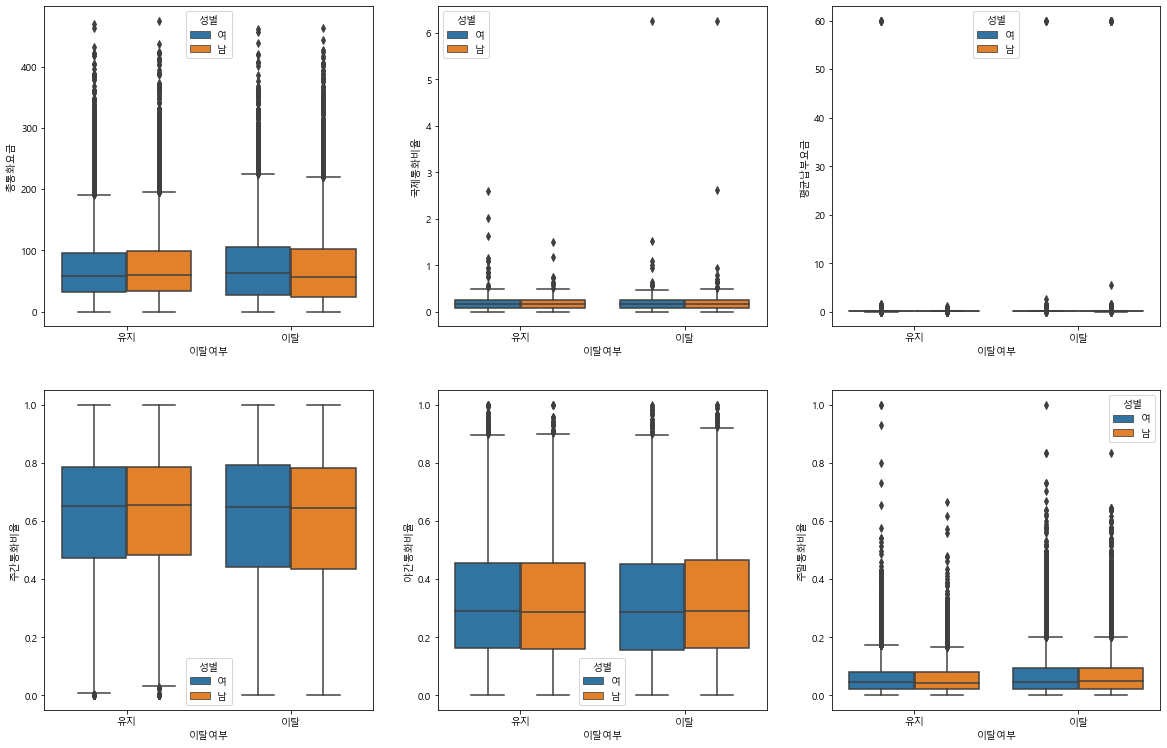

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
sns.boxplot(x="이탈여부", y="총통화요금", hue='성별', data=ddf)
plt.subplot(3, 3, 3)
sns.boxplot(x="이탈여부", y="평균납부요금", hue='성별', data=ddf)
plt.subplot(3, 3, 4)
sns.boxplot(x="이탈여부", y="주간통화비율", hue='성별', data=ddf)
plt.subplot(3, 3, 5)
sns.boxplot(x="이탈여부", y="야간통화비율", hue='성별', data=ddf)
plt.subplot(3, 3, 6)
sns.boxplot(x="이탈여부", y="주말통화비율", hue='성별', data=ddf)
plt.subplot(3, 3, 2)
sns.boxplot(x="이탈여부", y="국제통화비율", hue='성별', data=ddf)
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


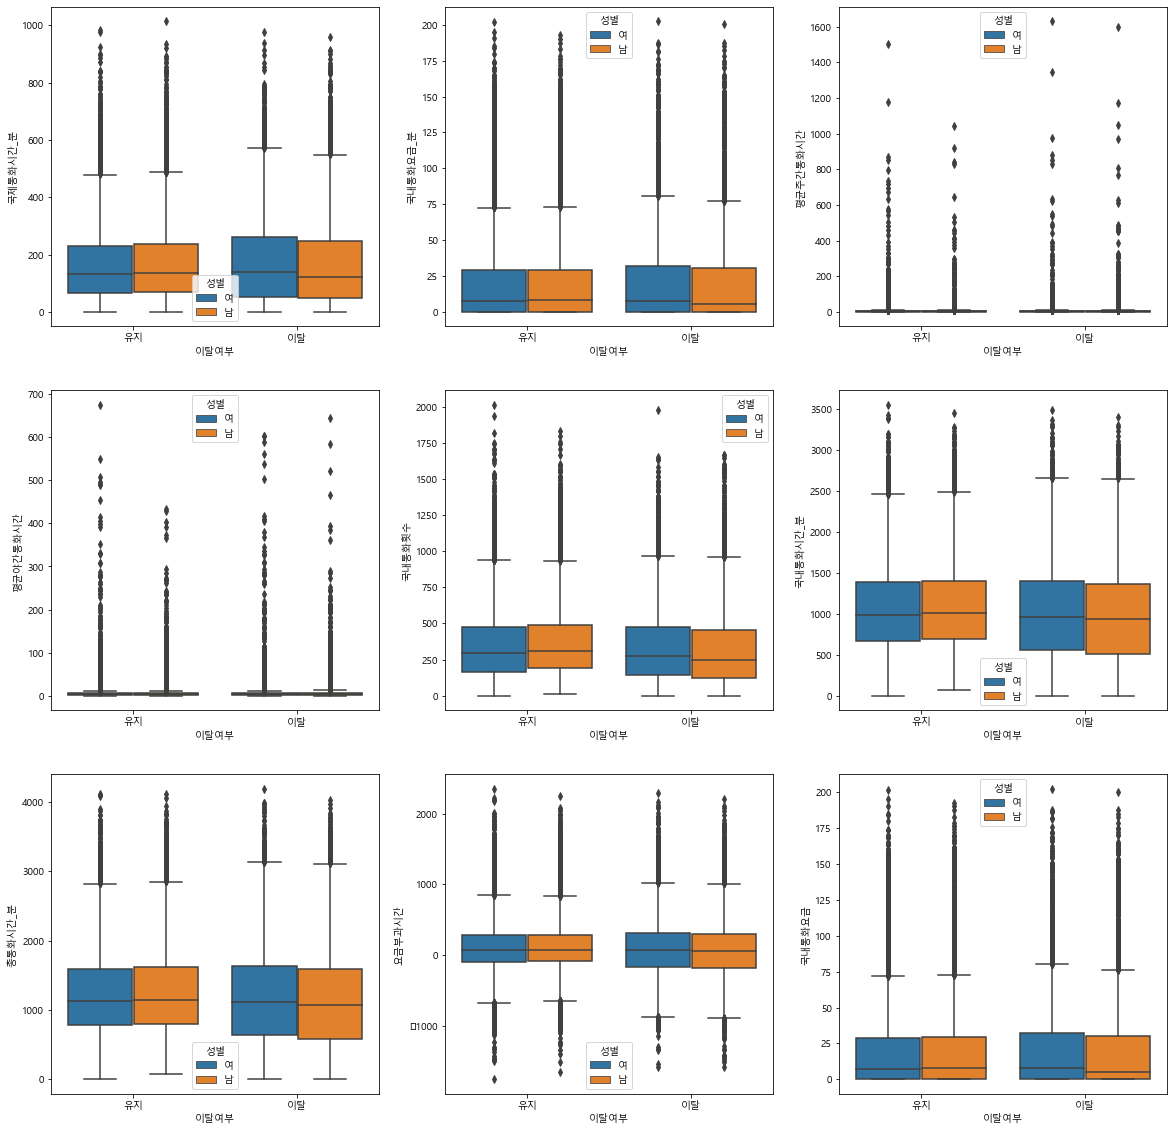

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
sns.boxplot(x="이탈여부", y="국제통화시간_분", hue='성별', data=ddf)
plt.subplot(3, 3, 2)
sns.boxplot(x="이탈여부", y="국내통화요금_분", hue='성별', data=ddf)
plt.subplot(3, 3, 3)
sns.boxplot(x="이탈여부", y="평균주간통화시간", hue='성별', data=ddf)
plt.subplot(3, 3, 4)
sns.boxplot(x="이탈여부", y="평균야간통화시간", hue='성별', data=ddf)
plt.subplot(3, 3, 5)
sns.boxplot(x="이탈여부", y="국내통화횟수", hue='성별', data=ddf)
plt.subplot(3, 3, 6)
sns.boxplot(x="이탈여부", y="국내통화시간_분", hue='성별', data=ddf)
plt.subplot(3, 3, 7)
sns.boxplot(x="이탈여부", y="총통화시간_분", hue='성별', data=ddf)
plt.subplot(3, 3, 8)
sns.boxplot(x="이탈여부", y="요금부과시간", hue='성별', data=ddf)
plt.subplot(3, 3, 9)
sns.boxplot(x="이탈여부", y="국내통화요금", hue='성별', data=ddf)
plt.show()

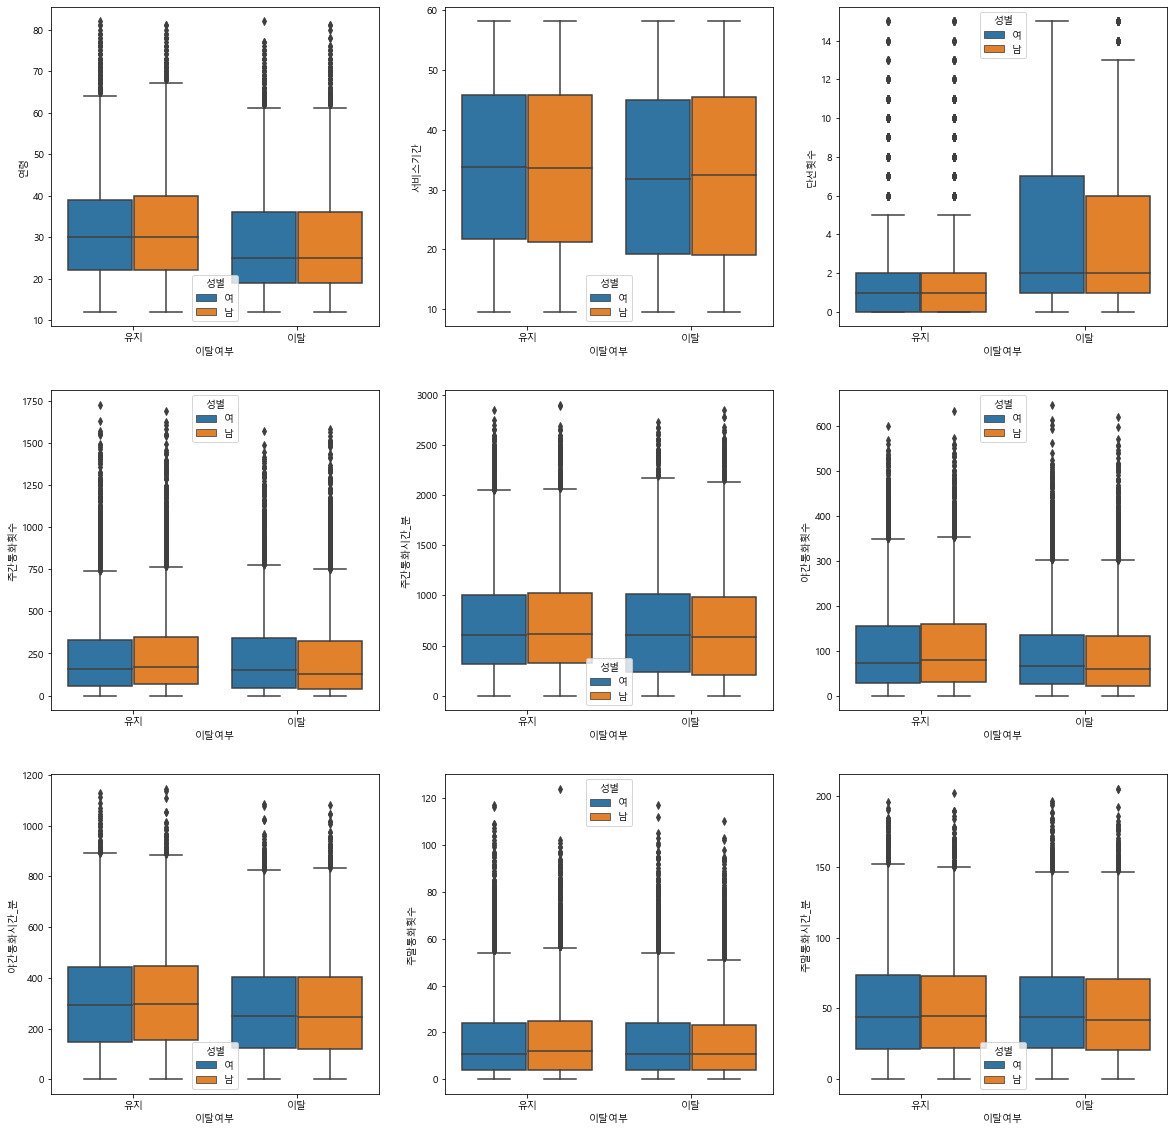

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
sns.boxplot(x="이탈여부", y="연령", hue='성별', data=ddf)
plt.subplot(3, 3, 2)
sns.boxplot(x="이탈여부", y="서비스기간", hue='성별', data=ddf)
plt.subplot(3, 3, 3)
sns.boxplot(x="이탈여부", y="단선횟수", hue='성별', data=ddf)
plt.subplot(3, 3, 4)
sns.boxplot(x="이탈여부", y="주간통화횟수", hue='성별', data=ddf)
plt.subplot(3, 3, 5)
sns.boxplot(x="이탈여부", y="주간통화시간_분", hue='성별', data=ddf)
plt.subplot(3, 3, 6)
sns.boxplot(x="이탈여부", y="야간통화횟수", hue='성별', data=ddf)
plt.subplot(3, 3, 7)
sns.boxplot(x="이탈여부", y="야간통화시간_분", hue='성별', data=ddf)
plt.subplot(3, 3, 8)
sns.boxplot(x="이탈여부", y="주말통화횟수", hue='성별', data=ddf)
plt.subplot(3, 3, 9)
sns.boxplot(x="이탈여부", y="주말통화시간_분", hue='성별', data=ddf)
plt.show()

In [14]:
data, label = [], []
for i in range(len(df2)):
    label.append(df2.iloc[i, 0])
    data.append(list(df2.iloc[i, 1:].values))
    
data = np.array(data, dtype=np.float32)
label = np.array(label)
data

array([[1.        , 0.20731707, 0.17239404, ..., 0.094245  , 0.02978479,
        0.        ],
       [0.        , 0.2804878 , 0.64089346, ..., 0.015695  , 0.0109029 ,
        0.        ],
       [0.        , 0.5121951 , 0.82245135, ..., 0.059715  , 0.01895743,
        0.        ],
       ...,
       [0.        , 0.15853658, 0.2279496 , ..., 0.062455  , 0.03372518,
        1.        ],
       [0.        , 0.37804878, 0.48568153, ..., 0.061674  , 0.04212226,
        1.        ],
       [0.        , 0.29268292, 0.26746848, ..., 0.095881  , 0.05174661,
        1.        ]], dtype=float32)

In [142]:
label

array([1., 1., 1., ..., 0., 0., 0.])

In [21]:
def get10fold(data, itr, fold=5):
    tot_length = len(data)
    each = int(tot_length/fold)
    mask = np.array([True if each*itr <= i < each*(itr+1) else False \
                    for i in list(range(tot_length))])
    
    return data[~mask], data[mask]

In [31]:
from sklearn.metrics import classification_report

def runCV(clf, shuffled_data, shuffled_labels, fold=5, isAcc=True):
    results = []
    for i in range(fold):
        train_data, test_data = get10fold(shuffled_data, i, fold=fold)
        train_labels, test_labels = get10fold(shuffled_labels, i, fold=fold)
        clf = clf.fit(train_data, train_labels)
        pred = clf.predict(test_data)
        correct = pred==test_labels
        if isAcc:
            acc = sum([1 if x==True else 0 for x in correct]) / len(correct)
            results.append(acc)
        else:
            results.append(classification_report(pred, test_labels))
            
    return results

In [23]:
from sklearn.neighbors import KNeighborsClassifier

numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
clf = KNeighborsClassifier()
results = runCV(clf, shuffled_data, shuffled_labels, fold=5, isAcc=False)
print(results[0])
print(results[1])
print(results[2])
print(results[3])
print(results[4])

              precision    recall  f1-score   support

         0.0       0.55      0.63      0.58      2532
         1.0       0.72      0.65      0.69      3816

    accuracy                           0.64      6348
   macro avg       0.63      0.64      0.64      6348
weighted avg       0.65      0.64      0.65      6348

              precision    recall  f1-score   support

         0.0       0.58      0.63      0.61      2677
         1.0       0.71      0.67      0.69      3671

    accuracy                           0.65      6348
   macro avg       0.65      0.65      0.65      6348
weighted avg       0.66      0.65      0.66      6348

              precision    recall  f1-score   support

         0.0       0.57      0.65      0.61      2595
         1.0       0.73      0.66      0.69      3753

    accuracy                           0.66      6348
   macro avg       0.65      0.66      0.65      6348
weighted avg       0.67      0.66      0.66      6348

              preci

In [24]:
from sklearn.linear_model import LogisticRegression 

numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
clf = LogisticRegression()
results = runCV(clf, shuffled_data, shuffled_labels, fold=5, isAcc=False)
print(results[0])
print(results[1])
print(results[2])
print(results[3])
print(results[4])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

              precision    recall  f1-score   support

         0.0       0.42      0.75      0.54      1661
         1.0       0.88      0.63      0.74      4687

    accuracy                           0.66      6348
   macro avg       0.65      0.69      0.64      6348
weighted avg       0.76      0.66      0.68      6348

              precision    recall  f1-score   support

         0.0       0.45      0.73      0.56      1795
         1.0       0.86      0.65      0.74      4553

    accuracy                           0.67      6348
   macro avg       0.65      0.69      0.65      6348
weighted avg       0.74      0.67      0.69      6348

              precision    recall  f1-score   support

         0.0       0.43      0.73      0.54      1735
         1.0       0.86      0.64      0.73      4613

    accuracy                           0.66      6348
   macro avg       0.64      0.68      0.64      6348
weighted avg       0.74      0.66      0.68      6348

              preci

In [25]:
from sklearn.neural_network import MLPClassifier

numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
clf = MLPClassifier(hidden_layer_sizes=20, max_iter=500)
results = runCV(clf, shuffled_data, shuffled_labels, fold=5, isAcc=False)
print(results[0])
print(results[1])
print(results[2])
print(results[3])
print(results[4])

              precision    recall  f1-score   support

         0.0       0.59      0.75      0.66      2307
         1.0       0.83      0.71      0.76      4041

    accuracy                           0.72      6348
   macro avg       0.71      0.73      0.71      6348
weighted avg       0.75      0.72      0.73      6348

              precision    recall  f1-score   support

         0.0       0.58      0.76      0.66      2288
         1.0       0.84      0.69      0.76      4060

    accuracy                           0.72      6348
   macro avg       0.71      0.73      0.71      6348
weighted avg       0.75      0.72      0.72      6348

              precision    recall  f1-score   support

         0.0       0.59      0.75      0.66      2293
         1.0       0.83      0.70      0.76      4055

    accuracy                           0.72      6348
   macro avg       0.71      0.73      0.71      6348
weighted avg       0.74      0.72      0.72      6348

              preci

In [26]:
from sklearn.ensemble import RandomForestClassifier

numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
clf = RandomForestClassifier()
results = runCV(clf, shuffled_data, shuffled_labels, fold=5, isAcc=False)
print(results[0])
print(results[1])
print(results[2])
print(results[3])
print(results[4])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66      2873
         1.0       0.72      0.71      0.71      3475

    accuracy                           0.69      6348
   macro avg       0.69      0.69      0.69      6348
weighted avg       0.69      0.69      0.69      6348

              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67      2849
         1.0       0.74      0.71      0.72      3499

    accuracy                           0.70      6348
   macro avg       0.70      0.70      0.70      6348
weighted avg       0.70      0.70      0.70      6348

              precision    recall  f1-score   support

         0.0       0.66      0.67      0.66      2836
         1.0       0.73      0.71      0.72      3512

    accuracy                           0.70      6348
   macro avg       0.69      0.69      0.69      6348
weighted avg       0.70      0.70      0.70      6348

              preci

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
clf = LinearDiscriminantAnalysis()
results = runCV(clf, shuffled_data, shuffled_labels, fold=5, isAcc=False)
print(results[0])
print(results[1])
print(results[2])
print(results[3])
print(results[4])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


              precision    recall  f1-score   support

         0.0       0.43      0.75      0.55      1660
         1.0       0.88      0.66      0.75      4688

    accuracy                           0.68      6348
   macro avg       0.66      0.70      0.65      6348
weighted avg       0.76      0.68      0.70      6348

              precision    recall  f1-score   support

         0.0       0.42      0.75      0.54      1657
         1.0       0.88      0.64      0.74      4691

    accuracy                           0.67      6348
   macro avg       0.65      0.70      0.64      6348
weighted avg       0.76      0.67      0.69      6348

              precision    recall  f1-score   support

         0.0       0.43      0.79      0.55      1608
         1.0       0.90      0.64      0.75      4740

    accuracy                           0.68      6348
   macro avg       0.66      0.72      0.65      6348
weighted avg       0.78      0.68      0.70      6348

              preci

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
clf = QDA()
results = runCV(clf, shuffled_data, shuffled_labels, fold=5, isAcc=False)
print(results[0])
print(results[1])
print(results[2])
print(results[3])
print(results[4])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

         0.0       0.29      0.81      0.43      1069
         1.0       0.94      0.61      0.74      5279

    accuracy                           0.64      6348
   macro avg       0.62      0.71      0.58      6348
weighted avg       0.83      0.64      0.69      6348

              precision    recall  f1-score   support

         0.0       0.31      0.82      0.44      1113
         1.0       0.94      0.60      0.74      5235

    accuracy                           0.64      6348
   macro avg       0.62      0.71      0.59      6348
weighted avg       0.83      0.64      0.68      6348

              precision    recall  f1-score   support

         0.0       0.32      0.82      0.46      1169
         1.0       0.94      0.61      0.74      5179

    accuracy                           0.65      6348
   macro avg       0.63      0.71      0.60      6348
weighted avg       0.82      0.65      0.69      6348

              preci

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [29]:
#서포트 벡터 머신

from sklearn.svm import SVC

numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
clf = SVC()
results = runCV(clf, shuffled_data, shuffled_labels, fold=5, isAcc=False)
print(results[0])
print(results[1])
print(results[2])
print(results[3])
print(results[4])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

              precision    recall  f1-score   support

         0.0       0.29      0.88      0.44       972
         1.0       0.96      0.61      0.75      5376

    accuracy                           0.65      6348
   macro avg       0.63      0.74      0.59      6348
weighted avg       0.86      0.65      0.70      6348

              precision    recall  f1-score   support

         0.0       0.28      0.89      0.43       940
         1.0       0.97      0.61      0.75      5408

    accuracy                           0.65      6348
   macro avg       0.62      0.75      0.59      6348
weighted avg       0.87      0.65      0.70      6348

              precision    recall  f1-score   support

         0.0       0.31      0.87      0.45      1016
         1.0       0.96      0.63      0.76      5332

    accuracy                           0.67      6348
   macro avg       0.63      0.75      0.61      6348
weighted avg       0.86      0.67      0.71      6348

              preci

In [78]:
numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
split_point = int(len(shuffled_data) * 0.9)

model1 = KNeighborsClassifier()
model1 = model1.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
pred1 = model1.predict(shuffled_data[split_point:])
#f_value1 = model1.decision_function(shuffled_data[:split_point])

model2 = LogisticRegression()
model2 = model2.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
pred2 = model2.predict(shuffled_data[split_point:])
f_value2 = model2.decision_function(shuffled_data[:split_point])

model3 = MLPClassifier()
model3 = model3.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
pred3 = model3.predict(shuffled_data[split_point:])
#f_value3 = model3.decision_function(shuffled_data[:split_point])

model4 = RandomForestClassifier()
model4 = model4.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
pred4 = model4.predict(shuffled_data[split_point:])
#f_value4 = model4.decision_function(shuffled_data[:split_point])

model5 = LinearDiscriminantAnalysis()
model5 = model5.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
pred5 = model5.predict(shuffled_data[split_point:])
f_value5 = model5.decision_function(shuffled_data[:split_point])

model6 = QDA()
model6 = model6.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
pred6 = model6.predict(shuffled_data[split_point:])
f_value6 = model6.decision_function(shuffled_data[:split_point])

model7 = SVC(probability=True)
model7 = model7.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
pred7 = model7.predict(shuffled_data[split_point:])
f_value7 = model7.decision_function(shuffled_data[:split_point])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' 

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

fpr1, tpr1, thresholds1 = roc_curve(shuffled_labels[split_point:], \
                                    model1.predict_proba(shuffled_data[split_point:])[:, 1])
cm1 = confusion_matrix(shuffled_labels[split_point:]\
                 , pred1, labels=[1, 0])
recall1 = cm1[0][0] / (cm1[0][0] + cm1[0][1])
fallout1 = cm1[1][0] / (cm1[1][0] + cm1[1][1])

fpr2, tpr2, thresholds2 = roc_curve(shuffled_labels[split_point:], \
                                    model2.predict_proba(shuffled_data[split_point:])[:, 1])
cm2 = confusion_matrix(shuffled_labels[split_point:]\
                 , pred2, labels=[1, 0])
recall2 = cm2[0][0] / (cm2[0][0] + cm2[0][1])
fallout2 = cm2[1][0] / (cm2[1][0] + cm2[1][1])

fpr3, tpr3, thresholds3 = roc_curve(shuffled_labels[split_point:], \
                                    model3.predict_proba(shuffled_data[split_point:])[:, 1])
cm3 = confusion_matrix(shuffled_labels[split_point:]\
                 , pred3, labels=[1, 0])
recall3 = cm3[0][0] / (cm3[0][0] + cm3[0][1])
fallout3 = cm3[1][0] / (cm3[1][0] + cm3[1][1])

fpr4, tpr4, thresholds4 = roc_curve(shuffled_labels[split_point:], \
                                    model4.predict_proba(shuffled_data[split_point:])[:, 1])
cm4 = confusion_matrix(shuffled_labels[split_point:]\
                 , pred4, labels=[1, 0])
recall4 = cm4[0][0] / (cm4[0][0] + cm4[0][1])
fallout4 = cm4[1][0] / (cm4[1][0] + cm4[1][1])

fpr5, tpr5, thresholds5 = roc_curve(shuffled_labels[split_point:], \
                                    model5.predict_proba(shuffled_data[split_point:])[:, 1])
cm5 = confusion_matrix(shuffled_labels[split_point:]\
                 , pred5, labels=[1, 0])
recall5 = cm5[0][0] / (cm5[0][0] + cm5[0][1])
fallout5 = cm5[1][0] / (cm5[1][0] + cm5[1][1])

fpr6, tpr6, thresholds6 = roc_curve(shuffled_labels[split_point:], \
                                    model6.predict_proba(shuffled_data[split_point:])[:, 1])
cm6 = confusion_matrix(shuffled_labels[split_point:]\
                 , pred6, labels=[1, 0])
recall6 = cm6[0][0] / (cm6[0][0] + cm6[0][1])
fallout6 = cm6[1][0] / (cm6[1][0] + cm6[1][1])

fpr7, tpr7, thresholds7 = roc_curve(shuffled_labels[split_point:], \
                                    model7.predict_proba(shuffled_data[split_point:])[:, 1])
cm7 = confusion_matrix(shuffled_labels[split_point:]\
                 , pred7, labels=[1, 0])
recall7 = cm7[0][0] / (cm7[0][0] + cm7[0][1])
fallout7 = cm7[1][0] / (cm7[1][0] + cm7[1][1])

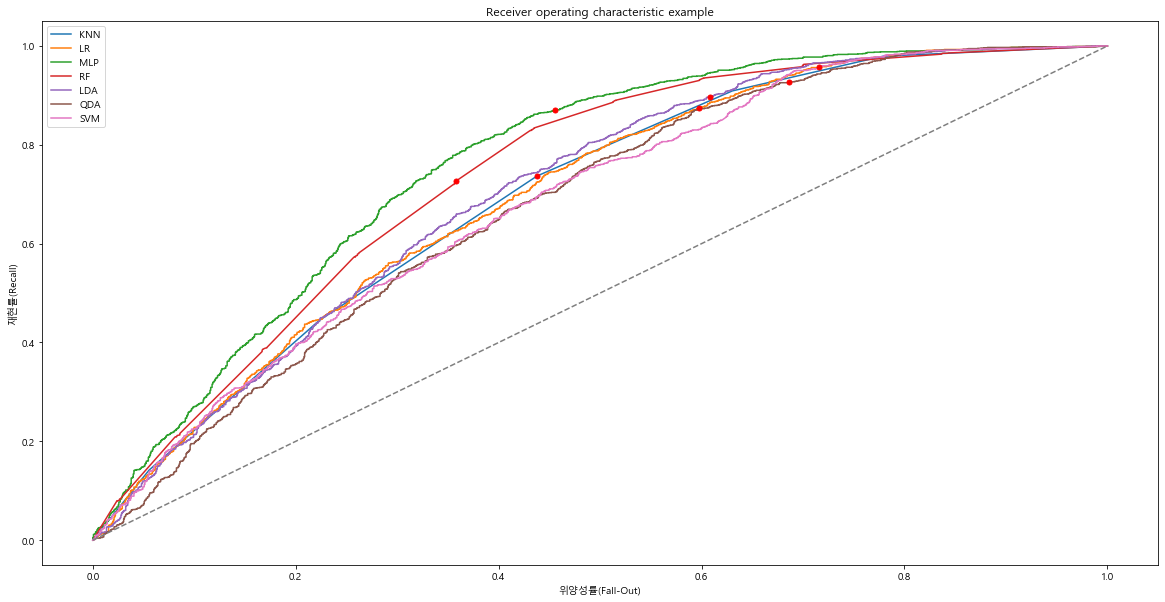

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr1, tpr1, label='KNN')
plt.plot(fpr2, tpr2, label='LR')
plt.plot(fpr3, tpr3, label='MLP')
plt.plot(fpr4, tpr4, label='RF')
plt.plot(fpr5, tpr5, label='LDA')
plt.plot(fpr6, tpr6, label='QDA')
plt.plot(fpr7, tpr7, label='SVM')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout1], [recall1], 'ro', ms=5)
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.plot([fallout3], [recall3], 'ro', ms=5)
plt.plot([fallout4], [recall4], 'ro', ms=5)
plt.plot([fallout5], [recall5], 'ro', ms=5)
plt.plot([fallout6], [recall6], 'ro', ms=5)
plt.plot([fallout7], [recall7], 'ro', ms=5)
plt.legend()
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('최적 모델 찾기1')
plt.show()

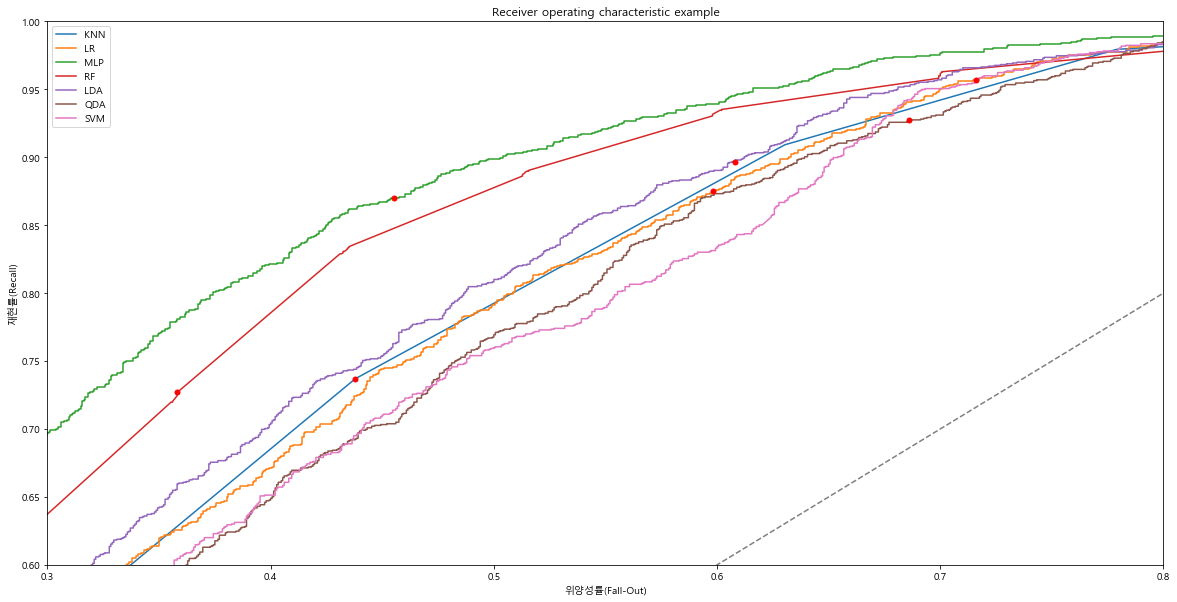

In [88]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr1, tpr1, label='KNN')
plt.plot(fpr2, tpr2, label='LR')
plt.plot(fpr3, tpr3, label='MLP')
plt.plot(fpr4, tpr4, label='RF')
plt.plot(fpr5, tpr5, label='LDA')
plt.plot(fpr6, tpr6, label='QDA')
plt.plot(fpr7, tpr7, label='SVM')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout1], [recall1], 'ro', ms=5)
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.plot([fallout3], [recall3], 'ro', ms=5)
plt.plot([fallout4], [recall4], 'ro', ms=5)
plt.plot([fallout5], [recall5], 'ro', ms=5)
plt.plot([fallout6], [recall6], 'ro', ms=5)
plt.plot([fallout7], [recall7], 'ro', ms=5)
plt.legend()
plt.xlim(0.3, 0.8)
plt.ylim(0.6, 1)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('최적 모델 찾기1')
plt.show()

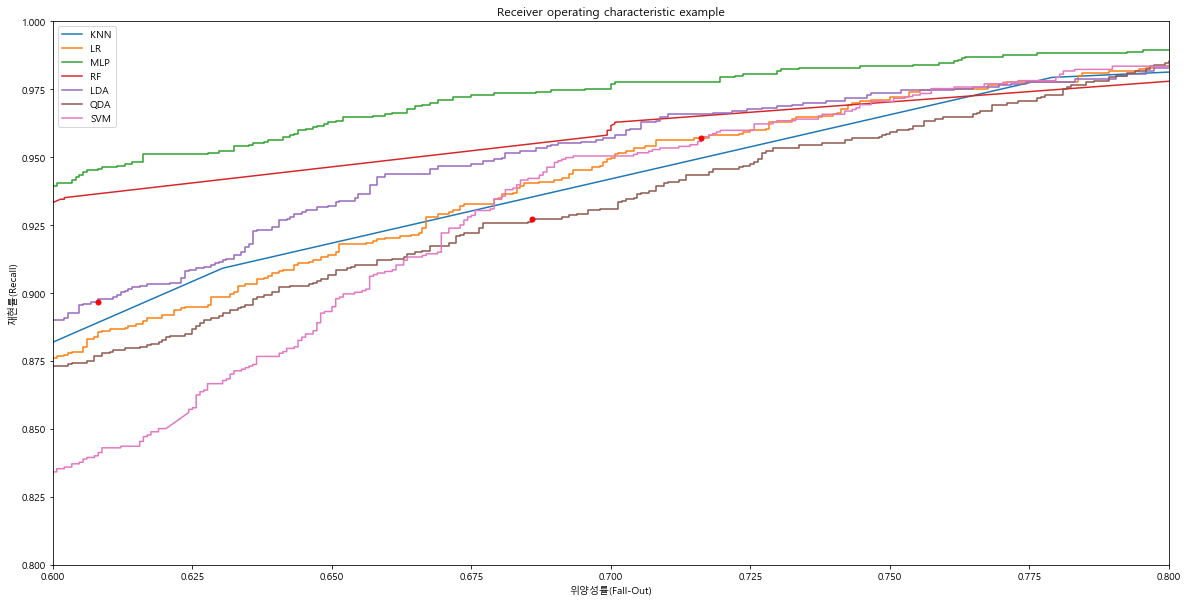

In [91]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr1, tpr1, label='KNN')
plt.plot(fpr2, tpr2, label='LR')
plt.plot(fpr3, tpr3, label='MLP')
plt.plot(fpr4, tpr4, label='RF')
plt.plot(fpr5, tpr5, label='LDA')
plt.plot(fpr6, tpr6, label='QDA')
plt.plot(fpr7, tpr7, label='SVM')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout1], [recall1], 'ro', ms=5)
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.plot([fallout3], [recall3], 'ro', ms=5)
plt.plot([fallout4], [recall4], 'ro', ms=5)
plt.plot([fallout5], [recall5], 'ro', ms=5)
plt.plot([fallout6], [recall6], 'ro', ms=5)
plt.plot([fallout7], [recall7], 'ro', ms=5)
plt.legend()
plt.xlim(0.6, 0.8)
plt.ylim(0.8, 1)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('최적 모델 찾기1')
plt.show()

In [93]:
MLP1 = MLPClassifier(hidden_layer_sizes=20)
MLP1 = MLP1.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred1 = MLP1.predict(shuffled_data[split_point:])

MLP2 = MLPClassifier(hidden_layer_sizes=40)
MLP2 = MLP2.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred2 = MLP2.predict(shuffled_data[split_point:])

MLP3 = MLPClassifier(hidden_layer_sizes=60)
MLP3 = MLP3.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred3 = MLP3.predict(shuffled_data[split_point:])

MLP4 = MLPClassifier(hidden_layer_sizes=80)
MLP4 = MLP4.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred4 = MLP4.predict(shuffled_data[split_point:])

MLP5 = MLPClassifier(hidden_layer_sizes=100)
MLP5 = MLP5.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred5 = MLP5.predict(shuffled_data[split_point:])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

In [94]:
fpr1, tpr1, thresholds1 = roc_curve(shuffled_labels[split_point:], \
                                    MLP1.predict_proba(shuffled_data[split_point:])[:, 1])
cm1 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred1, labels=[1, 0])
recall1 = cm1[0][0] / (cm1[0][0] + cm1[0][1])
fallout1 = cm1[1][0] / (cm1[1][0] + cm1[1][1])

fpr2, tpr2, thresholds2 = roc_curve(shuffled_labels[split_point:], \
                                    MLP2.predict_proba(shuffled_data[split_point:])[:, 1])
cm2 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred2, labels=[1, 0])
recall2 = cm2[0][0] / (cm2[0][0] + cm2[0][1])
fallout2 = cm2[1][0] / (cm2[1][0] + cm2[1][1])

fpr3, tpr3, thresholds3 = roc_curve(shuffled_labels[split_point:], \
                                    MLP3.predict_proba(shuffled_data[split_point:])[:, 1])
cm3 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred3, labels=[1, 0])
recall3 = cm3[0][0] / (cm3[0][0] + cm3[0][1])
fallout3 = cm3[1][0] / (cm3[1][0] + cm3[1][1])

fpr4, tpr4, thresholds4 = roc_curve(shuffled_labels[split_point:], \
                                    MLP4.predict_proba(shuffled_data[split_point:])[:, 1])
cm4 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred4, labels=[1, 0])
recall4 = cm4[0][0] / (cm4[0][0] + cm4[0][1])
fallout4 = cm4[1][0] / (cm4[1][0] + cm4[1][1])

fpr5, tpr5, thresholds5 = roc_curve(shuffled_labels[split_point:], \
                                    MLP5.predict_proba(shuffled_data[split_point:])[:, 1])
cm5 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred5, labels=[1, 0])
recall5 = cm5[0][0] / (cm5[0][0] + cm5[0][1])
fallout5 = cm5[1][0] / (cm5[1][0] + cm5[1][1])

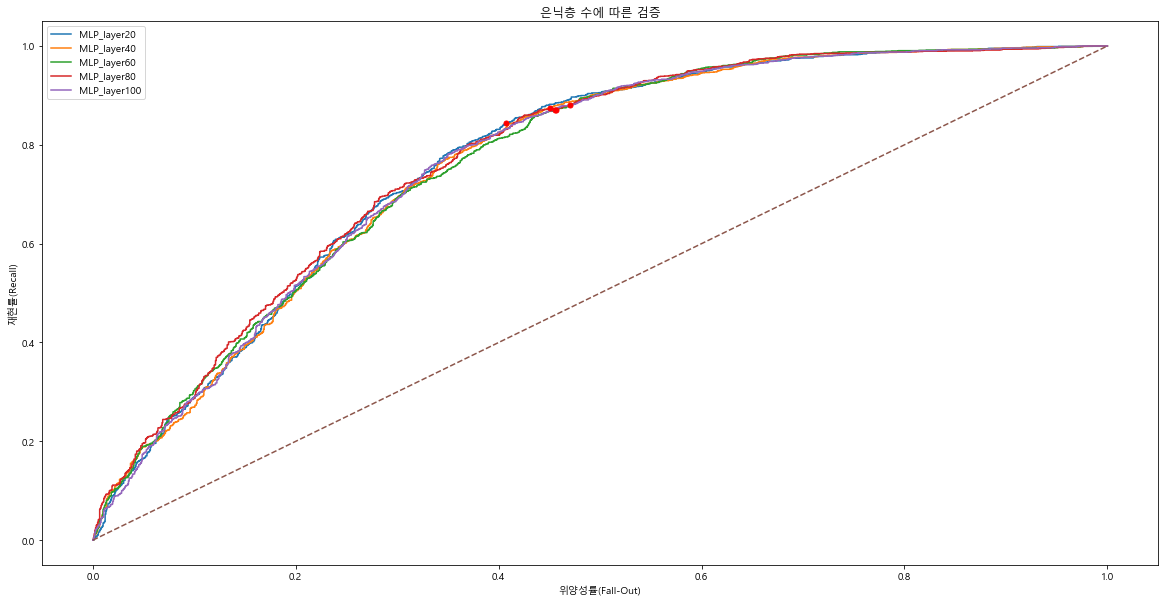

In [95]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr1, tpr1, label='MLP_layer20')
plt.plot(fpr2, tpr2, label='MLP_layer40')
plt.plot(fpr3, tpr3, label='MLP_layer60')
plt.plot(fpr4, tpr4, label='MLP_layer80')
plt.plot(fpr5, tpr5, label='MLP_layer100')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout1], [recall1], 'ro', ms=5)
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.plot([fallout3], [recall3], 'ro', ms=5)
plt.plot([fallout4], [recall4], 'ro', ms=5)
plt.plot([fallout5], [recall5], 'ro', ms=5)
plt.legend()
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('은닉층 수에 따른 검증')
plt.show()

#은닉층 수 20개

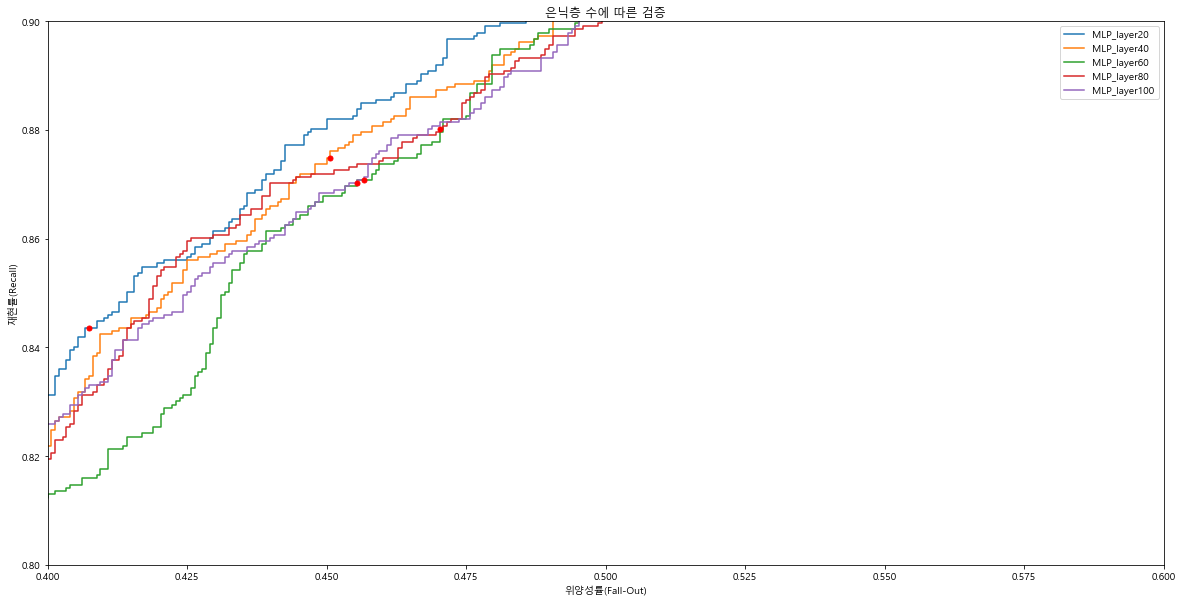

In [96]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr1, tpr1, label='MLP_layer20')
plt.plot(fpr2, tpr2, label='MLP_layer40')
plt.plot(fpr3, tpr3, label='MLP_layer60')
plt.plot(fpr4, tpr4, label='MLP_layer80')
plt.plot(fpr5, tpr5, label='MLP_layer100')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout1], [recall1], 'ro', ms=5)
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.plot([fallout3], [recall3], 'ro', ms=5)
plt.plot([fallout4], [recall4], 'ro', ms=5)
plt.plot([fallout5], [recall5], 'ro', ms=5)
plt.legend()
plt.xlim(0.4, 0.6)
plt.ylim(0.8,0.9)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('은닉층 수에 따른 검증')
plt.show()

In [97]:
MLP1 = MLPClassifier(learning_rate_init=0.0001)
MLP1 = MLP1.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred1 = MLP1.predict(shuffled_data[split_point:])

MLP2 = MLPClassifier(learning_rate_init=0.001)
MLP2 = MLP2.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred2 = MLP2.predict(shuffled_data[split_point:])

MLP3 = MLPClassifier(learning_rate_init=0.01)
MLP3 = MLP3.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred3 = MLP3.predict(shuffled_data[split_point:])

MLP4 = MLPClassifier(learning_rate_init=0.1)
MLP4 = MLP4.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred4 = MLP4.predict(shuffled_data[split_point:])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [98]:
fpr1, tpr1, thresholds1 = roc_curve(shuffled_labels[split_point:], \
                                    MLP1.predict_proba(shuffled_data[split_point:])[:, 1])
cm1 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred1, labels=[1, 0])
recall1 = cm1[0][0] / (cm1[0][0] + cm1[0][1])
fallout1 = cm1[1][0] / (cm1[1][0] + cm1[1][1])

fpr2, tpr2, thresholds2 = roc_curve(shuffled_labels[split_point:], \
                                    MLP2.predict_proba(shuffled_data[split_point:])[:, 1])
cm2 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred2, labels=[1, 0])
recall2 = cm2[0][0] / (cm2[0][0] + cm2[0][1])
fallout2 = cm2[1][0] / (cm2[1][0] + cm2[1][1])

fpr3, tpr3, thresholds3 = roc_curve(shuffled_labels[split_point:], \
                                    MLP3.predict_proba(shuffled_data[split_point:])[:, 1])
cm3 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred3, labels=[1, 0])
recall3 = cm3[0][0] / (cm3[0][0] + cm3[0][1])
fallout3 = cm3[1][0] / (cm3[1][0] + cm3[1][1])

fpr4, tpr4, thresholds4 = roc_curve(shuffled_labels[split_point:], \
                                    MLP4.predict_proba(shuffled_data[split_point:])[:, 1])
cm4 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred4, labels=[1, 0])
recall4 = cm4[0][0] / (cm4[0][0] + cm4[0][1])
fallout4 = cm4[1][0] / (cm4[1][0] + cm4[1][1])

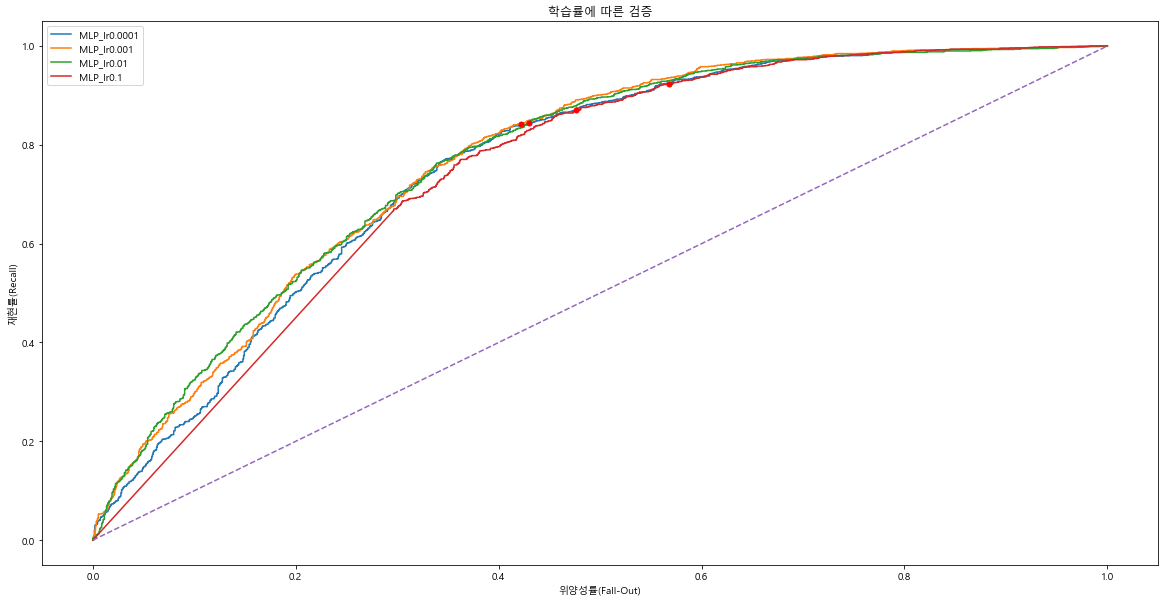

In [99]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr1, tpr1, label='MLP_lr0.0001')
plt.plot(fpr2, tpr2, label='MLP_lr0.001')
plt.plot(fpr3, tpr3, label='MLP_lr0.01')
plt.plot(fpr4, tpr4, label='MLP_lr0.1')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout1], [recall1], 'ro', ms=5)
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.plot([fallout3], [recall3], 'ro', ms=5)
plt.plot([fallout4], [recall4], 'ro', ms=5)
plt.legend()
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('학습률에 따른 검증')
plt.show()

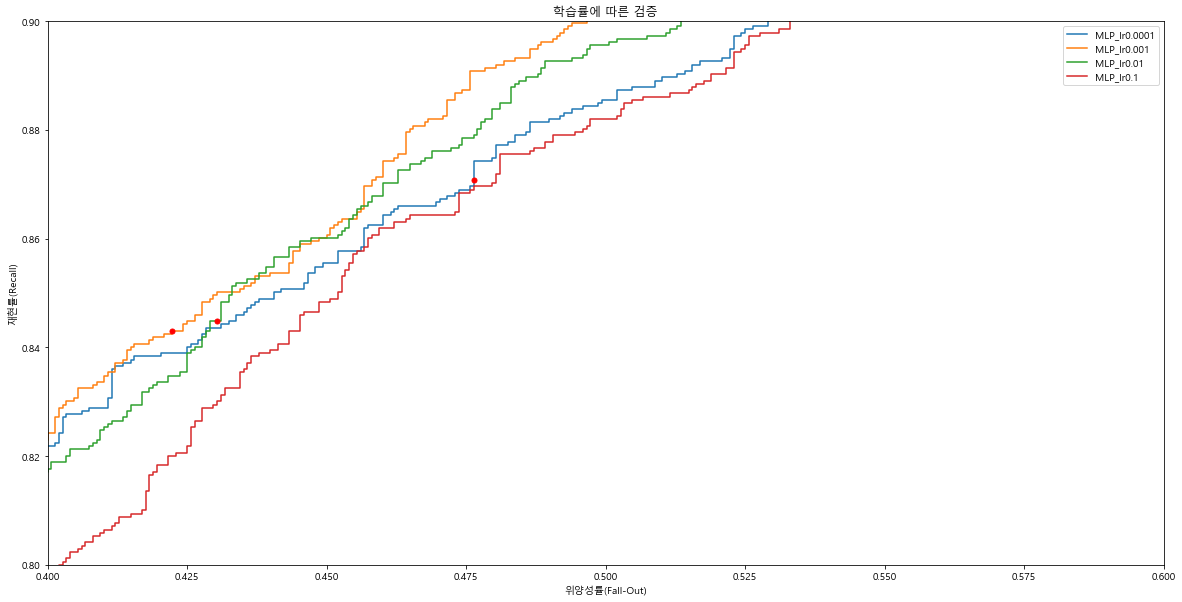

In [100]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr1, tpr1, label='MLP_lr0.0001')
plt.plot(fpr2, tpr2, label='MLP_lr0.001')
plt.plot(fpr3, tpr3, label='MLP_lr0.01')
plt.plot(fpr4, tpr4, label='MLP_lr0.1')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout1], [recall1], 'ro', ms=5)
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.plot([fallout3], [recall3], 'ro', ms=5)
plt.plot([fallout4], [recall4], 'ro', ms=5)
plt.legend()
plt.xlim(0.4, 0.6)
plt.ylim(0.8,0.9)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('학습률에 따른 검증')
plt.show()

#학습률 0.01

In [102]:
MLP1 = MLPClassifier(activation='relu')
MLP1 = MLP1.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred1 = MLP1.predict(shuffled_data[split_point:])

MLP2 = MLPClassifier(activation='identity')
MLP2 = MLP2.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred2 = MLP2.predict(shuffled_data[split_point:])

MLP3 = MLPClassifier(activation='logistic')
MLP3 = MLP3.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred3 = MLP3.predict(shuffled_data[split_point:])

MLP4 = MLPClassifier(activation='tanh')
MLP4 = MLP4.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred4 = MLP4.predict(shuffled_data[split_point:])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [104]:
fpr1, tpr1, thresholds1 = roc_curve(shuffled_labels[split_point:], \
                                    MLP1.predict_proba(shuffled_data[split_point:])[:, 1])
cm1 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred1, labels=[1, 0])
recall1 = cm1[0][0] / (cm1[0][0] + cm1[0][1])
fallout1 = cm1[1][0] / (cm1[1][0] + cm1[1][1])

fpr2, tpr2, thresholds2 = roc_curve(shuffled_labels[split_point:], \
                                    MLP2.predict_proba(shuffled_data[split_point:])[:, 1])
cm2 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred2, labels=[1, 0])
recall2 = cm2[0][0] / (cm2[0][0] + cm2[0][1])
fallout2 = cm2[1][0] / (cm2[1][0] + cm2[1][1])

fpr3, tpr3, thresholds3 = roc_curve(shuffled_labels[split_point:], \
                                    MLP3.predict_proba(shuffled_data[split_point:])[:, 1])
cm3 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred3, labels=[1, 0])
recall3 = cm3[0][0] / (cm3[0][0] + cm3[0][1])
fallout3 = cm3[1][0] / (cm3[1][0] + cm3[1][1])

fpr4, tpr4, thresholds4 = roc_curve(shuffled_labels[split_point:], \
                                    MLP4.predict_proba(shuffled_data[split_point:])[:, 1])
cm4 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred4, labels=[1, 0])
recall4 = cm4[0][0] / (cm4[0][0] + cm4[0][1])
fallout4 = cm4[1][0] / (cm4[1][0] + cm4[1][1])

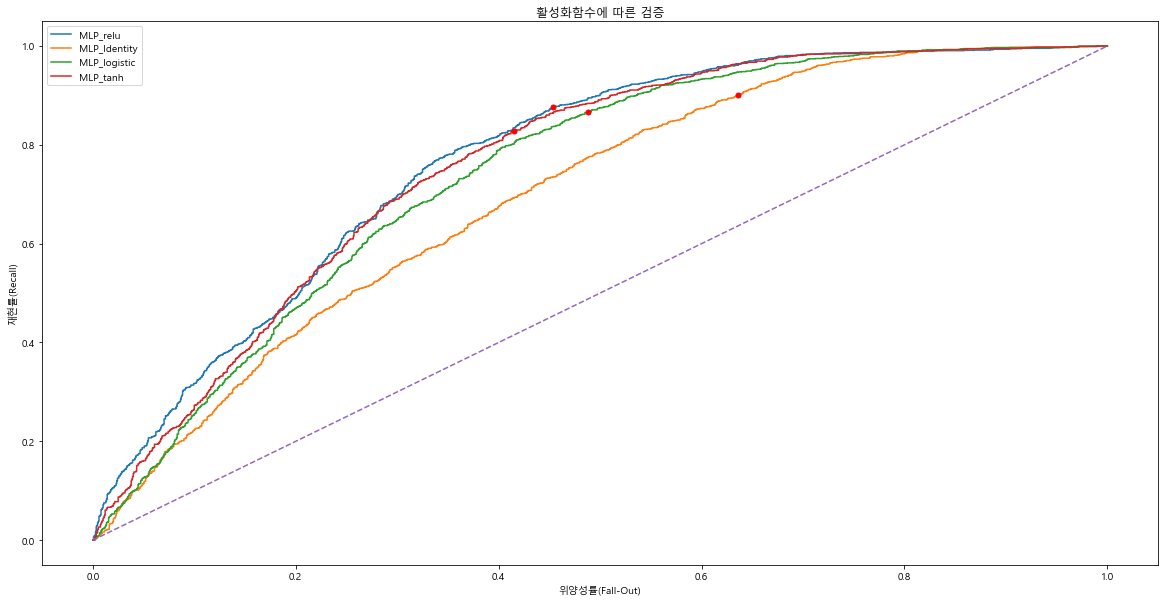

In [105]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr1, tpr1, label='MLP_relu')
plt.plot(fpr2, tpr2, label='MLP_Identity')
plt.plot(fpr3, tpr3, label='MLP_logistic')
plt.plot(fpr4, tpr4, label='MLP_tanh')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout1], [recall1], 'ro', ms=5)
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.plot([fallout3], [recall3], 'ro', ms=5)
plt.plot([fallout4], [recall4], 'ro', ms=5)
plt.legend()
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('활성화함수에 따른 검증')
plt.show()

#활성화함수 relu

In [107]:
MLP1 = MLPClassifier(solver='sgd')
MLP1 = MLP1.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred1 = MLP1.predict(shuffled_data[split_point:])

MLP2 = MLPClassifier(solver='adam')
MLP2 = MLP2.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred2 = MLP2.predict(shuffled_data[split_point:])

MLP3 = MLPClassifier(solver='lbfgs')
MLP3 = MLP3.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred3 = MLP3.predict(shuffled_data[split_point:])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [108]:
fpr1, tpr1, thresholds1 = roc_curve(shuffled_labels[split_point:], \
                                    MLP1.predict_proba(shuffled_data[split_point:])[:, 1])
cm1 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred1, labels=[1, 0])
recall1 = cm1[0][0] / (cm1[0][0] + cm1[0][1])
fallout1 = cm1[1][0] / (cm1[1][0] + cm1[1][1])

fpr2, tpr2, thresholds2 = roc_curve(shuffled_labels[split_point:], \
                                    MLP2.predict_proba(shuffled_data[split_point:])[:, 1])
cm2 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred2, labels=[1, 0])
recall2 = cm2[0][0] / (cm2[0][0] + cm2[0][1])
fallout2 = cm2[1][0] / (cm2[1][0] + cm2[1][1])

fpr3, tpr3, thresholds3 = roc_curve(shuffled_labels[split_point:], \
                                    MLP3.predict_proba(shuffled_data[split_point:])[:, 1])
cm3 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred3, labels=[1, 0])
recall3 = cm3[0][0] / (cm3[0][0] + cm3[0][1])
fallout3 = cm3[1][0] / (cm3[1][0] + cm3[1][1])

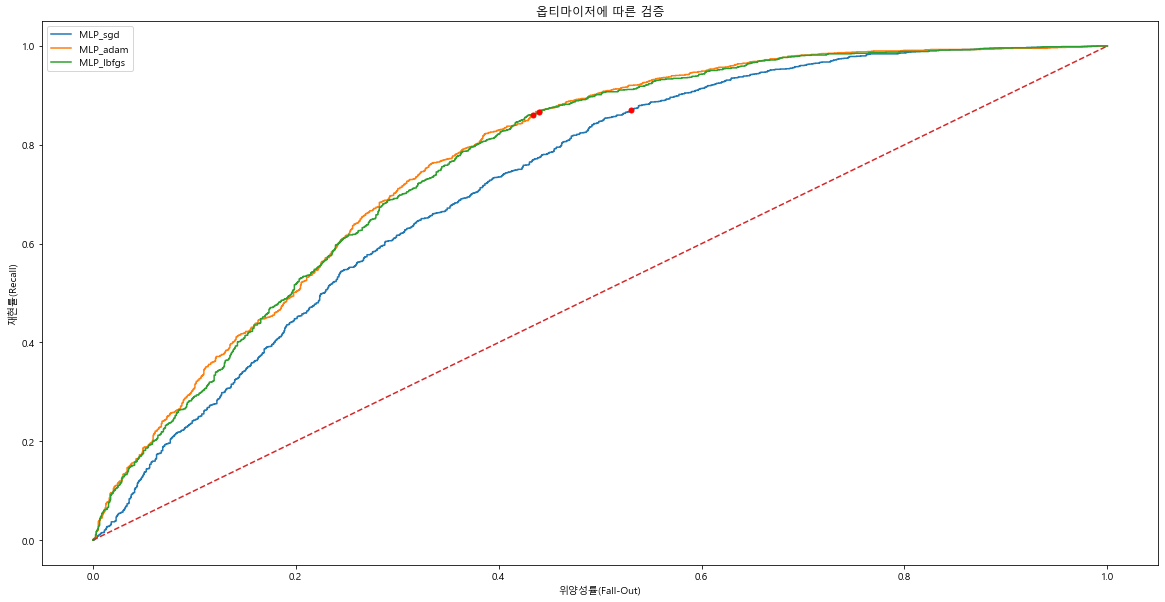

In [109]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr1, tpr1, label='MLP_sgd')
plt.plot(fpr2, tpr2, label='MLP_adam')
plt.plot(fpr3, tpr3, label='MLP_lbfgs')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout1], [recall1], 'ro', ms=5)
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.plot([fallout3], [recall3], 'ro', ms=5)
plt.legend()
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('옵티마이저에 따른 검증')
plt.show()

#옵티마이저 adam

In [118]:
MLP1 = MLPClassifier(max_iter=200)
MLP1 = MLP1.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred1 = MLP1.predict(shuffled_data[split_point:])

MLP2 = MLPClassifier(max_iter=400)
MLP2 = MLP2.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred2 = MLP2.predict(shuffled_data[split_point:])

MLP3 = MLPClassifier(max_iter=600)
MLP3 = MLP3.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred3 = MLP3.predict(shuffled_data[split_point:])

MLP4 = MLPClassifier(max_iter=800)
MLP4 = MLP4.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred4 = MLP4.predict(shuffled_data[split_point:])

MLP5 = MLPClassifier(max_iter=1000)
MLP5 = MLP5.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred5 = MLP5.predict(shuffled_data[split_point:])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [119]:
fpr1, tpr1, thresholds1 = roc_curve(shuffled_labels[split_point:], \
                                    MLP1.predict_proba(shuffled_data[split_point:])[:, 1])
cm1 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred1, labels=[1, 0])
recall1 = cm1[0][0] / (cm1[0][0] + cm1[0][1])
fallout1 = cm1[1][0] / (cm1[1][0] + cm1[1][1])

fpr2, tpr2, thresholds2 = roc_curve(shuffled_labels[split_point:], \
                                    MLP2.predict_proba(shuffled_data[split_point:])[:, 1])
cm2 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred2, labels=[1, 0])
recall2 = cm2[0][0] / (cm2[0][0] + cm2[0][1])
fallout2 = cm2[1][0] / (cm2[1][0] + cm2[1][1])

fpr3, tpr3, thresholds3 = roc_curve(shuffled_labels[split_point:], \
                                    MLP3.predict_proba(shuffled_data[split_point:])[:, 1])
cm3 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred3, labels=[1, 0])
recall3 = cm3[0][0] / (cm3[0][0] + cm3[0][1])
fallout3 = cm3[1][0] / (cm3[1][0] + cm3[1][1])

fpr4, tpr4, thresholds4 = roc_curve(shuffled_labels[split_point:], \
                                    MLP4.predict_proba(shuffled_data[split_point:])[:, 1])
cm4 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred4, labels=[1, 0])
recall4 = cm4[0][0] / (cm4[0][0] + cm4[0][1])
fallout4 = cm4[1][0] / (cm4[1][0] + cm4[1][1])

fpr5, tpr5, thresholds5 = roc_curve(shuffled_labels[split_point:], \
                                    MLP5.predict_proba(shuffled_data[split_point:])[:, 1])
cm5 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred5, labels=[1, 0])
recall5 = cm5[0][0] / (cm5[0][0] + cm5[0][1])
fallout5 = cm5[1][0] / (cm5[1][0] + cm5[1][1])

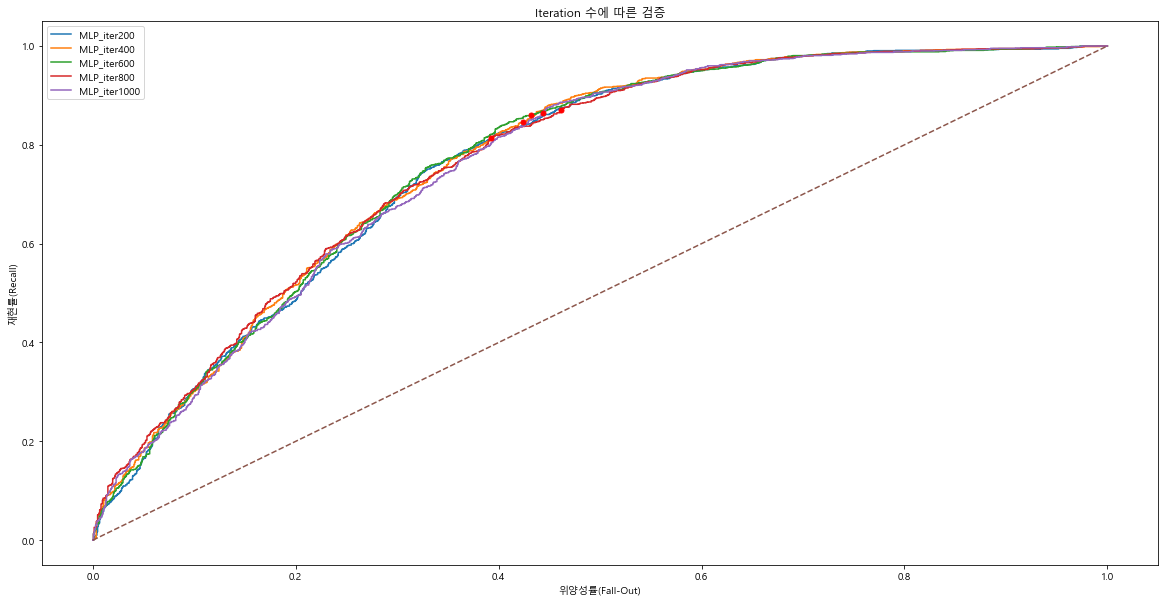

In [120]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr1, tpr1, label='MLP_iter200')
plt.plot(fpr2, tpr2, label='MLP_iter400')
plt.plot(fpr3, tpr3, label='MLP_iter600')
plt.plot(fpr4, tpr4, label='MLP_iter800')
plt.plot(fpr5, tpr5, label='MLP_iter1000')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout1], [recall1], 'ro', ms=5)
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.plot([fallout3], [recall3], 'ro', ms=5)
plt.plot([fallout4], [recall4], 'ro', ms=5)
plt.plot([fallout5], [recall5], 'ro', ms=5)
plt.legend()
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Iteration 수에 따른 검증')
plt.show()

#iter 600

In [121]:
MLP1 = MLPClassifier(batch_size=200)
MLP1 = MLP1.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred1 = MLP1.predict(shuffled_data[split_point:])

MLP2 = MLPClassifier(batch_size=400)
MLP2 = MLP2.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred2 = MLP2.predict(shuffled_data[split_point:])

MLP3 = MLPClassifier(batch_size=600)
MLP3 = MLP3.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred3 = MLP3.predict(shuffled_data[split_point:])

MLP4 = MLPClassifier(batch_size=800)
MLP4 = MLP4.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred4 = MLP4.predict(shuffled_data[split_point:])

MLP5 = MLPClassifier(batch_size=1000)
MLP5 = MLP5.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred5 = MLP5.predict(shuffled_data[split_point:])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

In [122]:
fpr1, tpr1, thresholds1 = roc_curve(shuffled_labels[split_point:], \
                                    MLP1.predict_proba(shuffled_data[split_point:])[:, 1])
cm1 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred1, labels=[1, 0])
recall1 = cm1[0][0] / (cm1[0][0] + cm1[0][1])
fallout1 = cm1[1][0] / (cm1[1][0] + cm1[1][1])

fpr2, tpr2, thresholds2 = roc_curve(shuffled_labels[split_point:], \
                                    MLP2.predict_proba(shuffled_data[split_point:])[:, 1])
cm2 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred2, labels=[1, 0])
recall2 = cm2[0][0] / (cm2[0][0] + cm2[0][1])
fallout2 = cm2[1][0] / (cm2[1][0] + cm2[1][1])

fpr3, tpr3, thresholds3 = roc_curve(shuffled_labels[split_point:], \
                                    MLP3.predict_proba(shuffled_data[split_point:])[:, 1])
cm3 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred3, labels=[1, 0])
recall3 = cm3[0][0] / (cm3[0][0] + cm3[0][1])
fallout3 = cm3[1][0] / (cm3[1][0] + cm3[1][1])

fpr4, tpr4, thresholds4 = roc_curve(shuffled_labels[split_point:], \
                                    MLP4.predict_proba(shuffled_data[split_point:])[:, 1])
cm4 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred4, labels=[1, 0])
recall4 = cm4[0][0] / (cm4[0][0] + cm4[0][1])
fallout4 = cm4[1][0] / (cm4[1][0] + cm4[1][1])

fpr5, tpr5, thresholds5 = roc_curve(shuffled_labels[split_point:], \
                                    MLP5.predict_proba(shuffled_data[split_point:])[:, 1])
cm5 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred5, labels=[1, 0])
recall5 = cm5[0][0] / (cm5[0][0] + cm5[0][1])
fallout5 = cm5[1][0] / (cm5[1][0] + cm5[1][1])

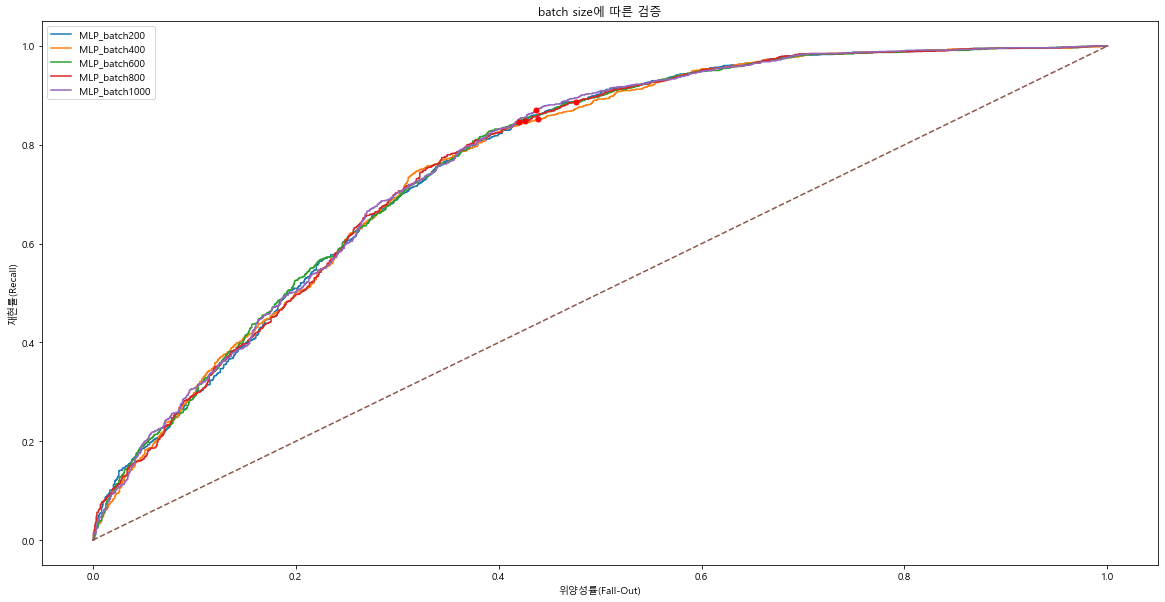

In [123]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr1, tpr1, label='MLP_batch200')
plt.plot(fpr2, tpr2, label='MLP_batch400')
plt.plot(fpr3, tpr3, label='MLP_batch600')
plt.plot(fpr4, tpr4, label='MLP_batch800')
plt.plot(fpr5, tpr5, label='MLP_batch1000')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout1], [recall1], 'ro', ms=5)
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.plot([fallout3], [recall3], 'ro', ms=5)
plt.plot([fallout4], [recall4], 'ro', ms=5)
plt.plot([fallout5], [recall5], 'ro', ms=5)
plt.legend()
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('batch size에 따른 검증')
plt.show()

#batch 500

In [143]:
MLP1 = MLPClassifier()
MLP1 = MLP1.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred1 = MLP1.predict(shuffled_data[split_point:])

MLP2 = MLPClassifier(hidden_layer_sizes=20,
                    activation='relu',
                    solver='adam',
                    batch_size=500,
                    learning_rate_init=0.01,
                    max_iter=600)
MLP2 = MLP2.fit(shuffled_data[:split_point], shuffled_labels[:split_point])
MLP_pred2 = MLP2.predict(shuffled_data[split_point:])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [144]:
fpr1, tpr1, thresholds1 = roc_curve(shuffled_labels[split_point:], \
                                    MLP1.predict_proba(shuffled_data[split_point:])[:, 1])
cm1 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred1, labels=[1, 0])
recall1 = cm1[0][0] / (cm1[0][0] + cm1[0][1])
fallout1 = cm1[1][0] / (cm1[1][0] + cm1[1][1])

fpr2, tpr2, thresholds2 = roc_curve(shuffled_labels[split_point:], \
                                    MLP2.predict_proba(shuffled_data[split_point:])[:, 1])
cm2 = confusion_matrix(shuffled_labels[split_point:]\
                 , MLP_pred2, labels=[1, 0])
recall2 = cm2[0][0] / (cm2[0][0] + cm2[0][1])
fallout2 = cm2[1][0] / (cm2[1][0] + cm2[1][1])

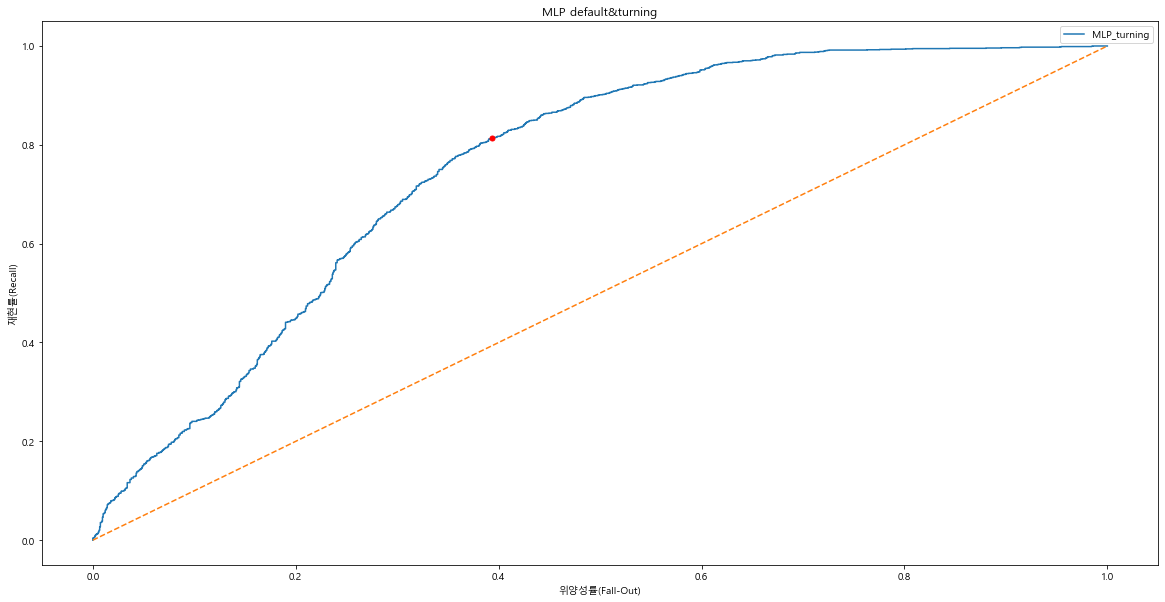

In [145]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(fpr2, tpr2, label='MLP_turning')
plt.plot([0,1], [0,1], linestyle='--')
plt.plot([fallout2], [recall2], 'ro', ms=5)
plt.legend()
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('MLP default&turning')
plt.show()

In [132]:
numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
results = runCV(MLP1, shuffled_data, shuffled_labels, fold=5, isAcc=False)
print(results[0])
print(results[1])
print(results[2])
print(results[3])
print(results[4])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

         0.0       0.59      0.76      0.67      2287
         1.0       0.84      0.70      0.77      4061

    accuracy                           0.73      6348
   macro avg       0.72      0.73      0.72      6348
weighted avg       0.75      0.73      0.73      6348

              precision    recall  f1-score   support

         0.0       0.57      0.78      0.66      2160
         1.0       0.86      0.69      0.77      4188

    accuracy                           0.72      6348
   macro avg       0.71      0.74      0.71      6348
weighted avg       0.76      0.72      0.73      6348

              precision    recall  f1-score   support

         0.0       0.57      0.78      0.66      2142
         1.0       0.86      0.69      0.77      4206

    accuracy                           0.72      6348
   macro avg       0.71      0.74      0.71      6348
weighted avg       0.76      0.72      0.73      6348

              preci

In [133]:
numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
results = runCV(MLP2, shuffled_data, shuffled_labels, fold=5, isAcc=False)
print(results[0])
print(results[1])
print(results[2])
print(results[3])
print(results[4])

              precision    recall  f1-score   support

         0.0       0.56      0.75      0.64      2179
         1.0       0.84      0.70      0.76      4169

    accuracy                           0.71      6348
   macro avg       0.70      0.72      0.70      6348
weighted avg       0.75      0.71      0.72      6348

              precision    recall  f1-score   support

         0.0       0.54      0.81      0.65      1953
         1.0       0.89      0.69      0.78      4395

    accuracy                           0.73      6348
   macro avg       0.71      0.75      0.71      6348
weighted avg       0.78      0.73      0.74      6348

              precision    recall  f1-score   support

         0.0       0.60      0.76      0.67      2282
         1.0       0.84      0.71      0.77      4066

    accuracy                           0.73      6348
   macro avg       0.72      0.74      0.72      6348
weighted avg       0.75      0.73      0.74      6348

              preci

In [137]:
numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
results = runCV(MLP2, shuffled_data, shuffled_labels, fold=5, isAcc=True)
print(results[0])
print(results[1])
print(results[2])
print(results[3])
print(results[4])
print(np.mean(results))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.724007561436673
0.7206994328922496
0.731411468178954
0.7318840579710145
0.7225897920604915
0.7261184625078766


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [138]:
numbers = list(range(len(data)))
shuffle(numbers)
shuffled_data = data[numbers]
shuffled_labels = label[numbers]
results = runCV(MLP2, shuffled_data, shuffled_labels, fold=5, isAcc=True)
print(results[0])
print(results[1])
print(results[2])
print(results[3])
print(results[4])
print(np.mean(results))

0.7140831758034026
0.7255828607435413
0.7288909892879647
0.7262129804662886
0.7103024574669187
0.7210144927536232
